In [2]:
import torch
import os
if "is/sg2" in os.getcwd():
    os.environ["CUDA_VISIBLE_DEVICES"] = "7"
from utils import seed_everything
import numpy as np

if "is/sg2" in os.getcwd():
    HF_CACHE_DIR = '/is/sg2/mkaut/.cache/huggingface/hub'
else:
    HF_CACHE_DIR = '/home/mkaut/.cache/huggingface/hub'

from PIL import Image, ImageFilter
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode

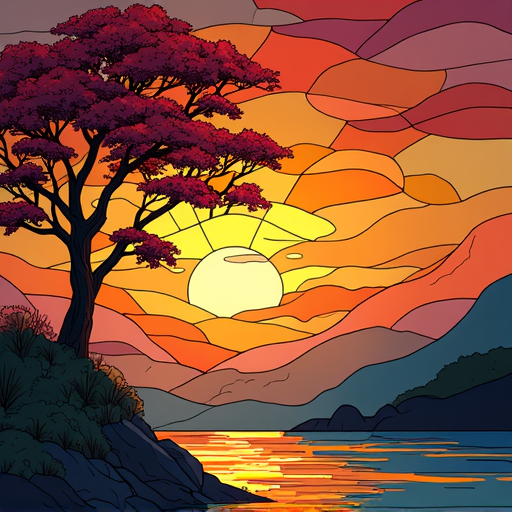

In [4]:
img = Image.open("/is/sg2/mkaut/ma-thesis/testimg.png")
display(img)

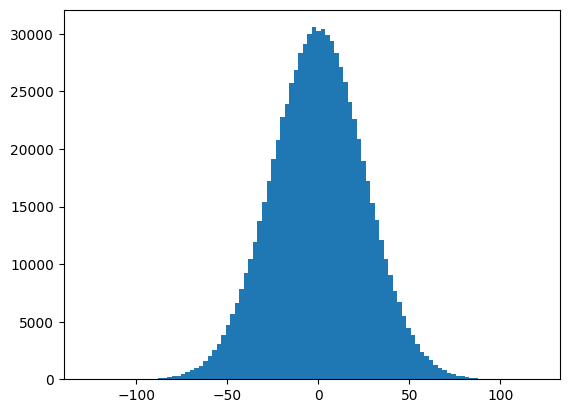

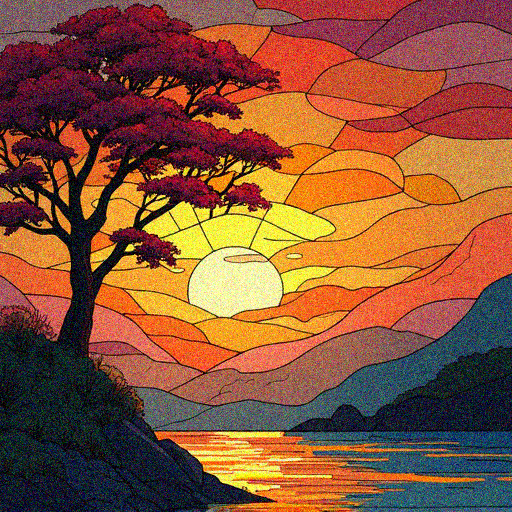

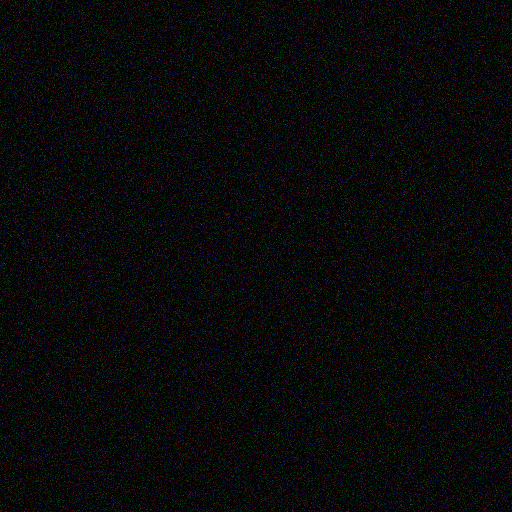

In [ ]:
from utils import seed_everything
seed = 0
seed_everything(seed)
mean = 0
std = 0.1

img_shape = np.array(img).shape
g_noise = np.random.normal(0, std, img_shape) * 255 

# import matplotlib.pyplot as plt
# plt.hist(g_noise.flatten(), bins=100)
# plt.show()
display(Image.fromarray(np.clip(np.array(img) + g_noise, 0, 255).astype(np.uint8)))
display(Image.fromarray(np.clip(g_noise, 0, 255).astype(np.uint8)))


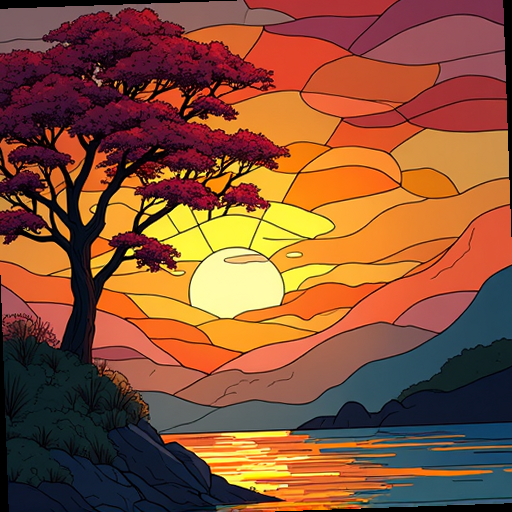

In [11]:
r_degree = 2

img1 = transforms.RandomRotation((r_degree, r_degree), interpolation=InterpolationMode.BICUBIC)(img)
display(img1)

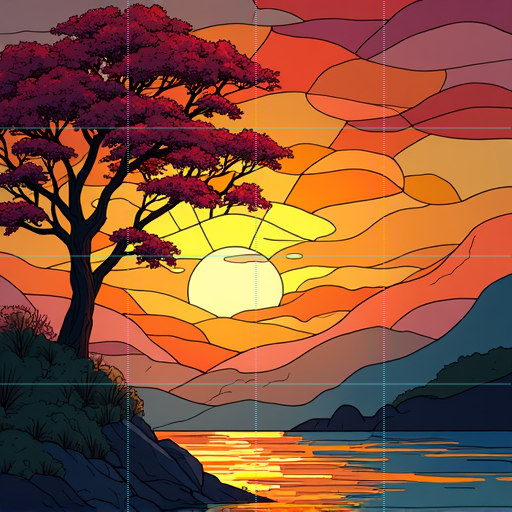

In [56]:
img_grid = Image.open("/is/sg2/mkaut/ma-thesis/testimg_grid.png")

# Fixed 25% area
crop_scale = 0.9
scale = (crop_scale, crop_scale)  # exact 25% area

# Aspect ratio varying by ±25%
ratio_variation = 0.9
ratio = (1 - ratio_variation, 1 + ratio_variation)  # (0.75, 1.25)

img1 = transforms.RandomResizedCrop(
    img1.size, 
    scale=scale,
    ratio=ratio,
    interpolation=InterpolationMode.BILINEAR
)(img_grid)
display(img1)

In [57]:
from diffusers import FluxPipeline, DiffusionPipeline, FluxImg2ImgPipeline


pipe = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-dev", 
                                    torch_dtype=torch.bfloat16,
                                    cache_dir=HF_CACHE_DIR)
pipe.to("cuda")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


FluxPipeline {
  "_class_name": "FluxPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "black-forest-labs/FLUX.1-dev",
  "feature_extractor": [
    null,
    null
  ],
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "FlowMatchEulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "T5EncoderModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "T5TokenizerFast"
  ],
  "transformer": [
    "diffusers",
    "FluxTransformer2DModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
# FLUX VAE
# pipe.vae.config.scaling_factor = 0.3611
# pipe.vae.config.shift_factor = 0.1159

In [32]:
from diffusers import StableDiffusionPipeline,DiffusionPipeline, StableDiffusionImg2ImgPipeline

pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1-base",
                                                  cache_dir=HF_CACHE_DIR)
pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "stabilityai/stable-diffusion-2-1-base",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}


[preprocess] image[0] is PIL.Image.Image

[preprocess] normalizing from min/max 0.0/1.0
[preprocess] to min/max -1.0/1.0

	[prepare latents] image min/max before VAE encode -1.0 1.0

	[prepare latents] init_latents min/max after VAE encode -22.596715927124023 25.478076934814453

	[prepare latents] init_latents min/max after scaling -4.115992069244385 4.64083194732666

	[prepare latents] init_latents min/max before adding noise -4.115992069244385 4.64083194732666

	[prepare latents] init_latents min/max after adding noise -4.101020336151123 3.9647462368011475

[forward call] latents min/max after prepare_latents (input to unet) -4.101020336151123 3.9647462368011475


  0%|          | 0/49 [00:00<?, ?it/s]


[forward call] latents min/max after denoising loop -6.216341972351074 5.0984416007995605

[forward call] image min/max after VAE decode -1.1148360967636108 1.0343796014785767

	[postprocess] image min/max -1.1148360967636108/1.0343796014785767

		[denormalizing] from min/max -1.1148360967636108/1.0343796014785767
		to min/max 0.0/1.0


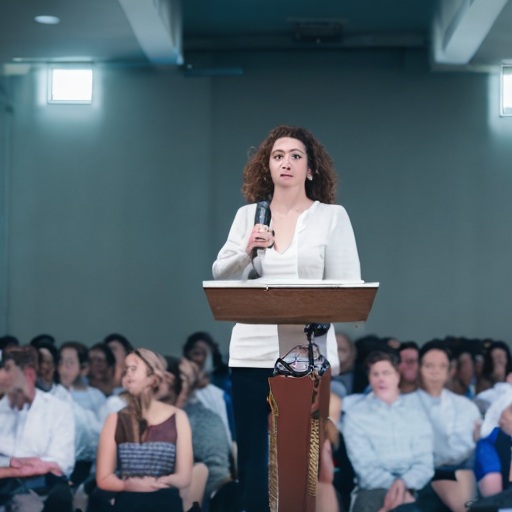

In [ ]:

prompts_single = "A young female speaker with short wavy brown hair in a white blouse at a podium facing a huge audience of a diverse group of young adults dressed casually, sitting in rows of chairs, in a lecture hall with white walls, photo over her shoulder, extra bright spotlight lighting on her, microphone on podium, clothing colorpalette red, orange, blue creating a professional and academic atmosphere."

img = Image.open("/is/sg2/mkaut/ma-thesis/experiments/rid/flux/mjprompts/num_10_fpr_0.01_cfg_3.0_wmch_16/encoded_imgs/data/nowm/5.png")

resolution = 512 
seed = 5356 # 13 best

seed_everything(seed) # local function to set all available seeds
#generators = [torch.Generator("cuda").manual_seed(s) for s in range(len(prompts))]

images = pipe(prompts_single, 
            #generator=generators,
            #image=img, strength=0.9999,
            num_inference_steps=50, 
            guidance_scale=3.0,
            height=resolution,
            width=resolution,
            ).images

display(images[0])


In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(int(np.ceil(np.sqrt(len(prompts)))), int(np.ceil(np.sqrt(len(prompts)))), figsize=(20, 20))
for i in range(len(prompts)):
    ax[i // int(np.ceil(np.sqrt(len(prompts))) ), i % int(np.ceil(np.sqrt(len(prompts))) )].imshow(images[i])
    ax[i // int(np.ceil(np.sqrt(len(prompts))) ), i % int(np.ceil(np.sqrt(len(prompts))) )].axis("off")


plt.show()
